In [17]:
import os 
import glob
import re 

import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib_venn

import numpy as np 
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

output_dir = '../output/visualize_ontology/'; 
if not os.path.exists(output_dir): os.makedirs(output_dir)

In [102]:
def build_ont_digraph(ont, term_color='red', gene_color='blue'):
    
    """
    Building a hierarchical digraph
    
    """ 
    
    G = nx.DiGraph()
 
    node_set = set()
    nodes = []
    for i, sr in ont.iterrows():   
        if sr.EdgeType in ['Child-Parent']:
            
            if sr.Parent not in node_set:
                node_set.add(sr.Parent)
                nodes.append([sr.Parent, 'Term', term_color])
                
            if sr.Child not in node_set:
                node_set.add(sr.Child)
                nodes.append([sr.Child, 'Term', term_color])

        elif sr.EdgeType in ['Gene-Term']:
            if sr.Parent not in node_set:
                node_set.add(sr.Parent)
                nodes.append([sr.Parent, 'Term', term_color])
                
            if sr.Child not in node_set:
                node_set.add(sr.Child)
                nodes.append([sr.Child, 'Gene', gene_color])
                
    for name, ntype, ncolor in nodes:
        G.add_node(name, type=ntype, color=ncolor)
        
    for i, sr in ont.iterrows():   
        G.add_edge(sr.Parent, sr.Child)
        
    return(G)

/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


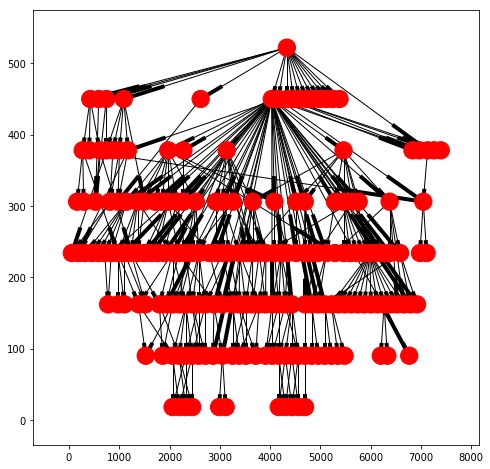

In [103]:
ont = '../data/synapse.txt'
ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'stringdb_ont.png')
fig.savefig(fn, dpi=200)

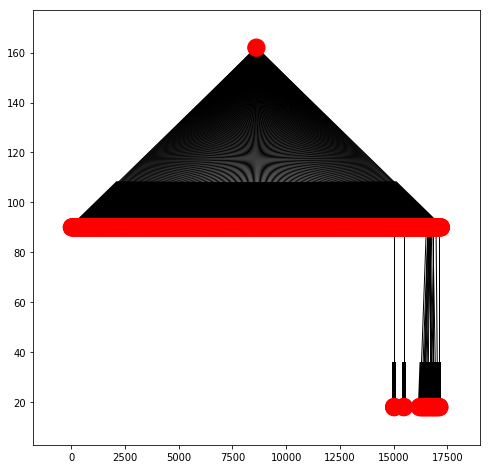

In [107]:
ont = '../output/analyzing_clixo_ontologies/'
ont += 'option2_string_synapse_interactions_combined_score.clixo_alpha0.2_beta0.7.txt'
ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'stringdb_ont.png')
fig.savefig(fn, dpi=200)

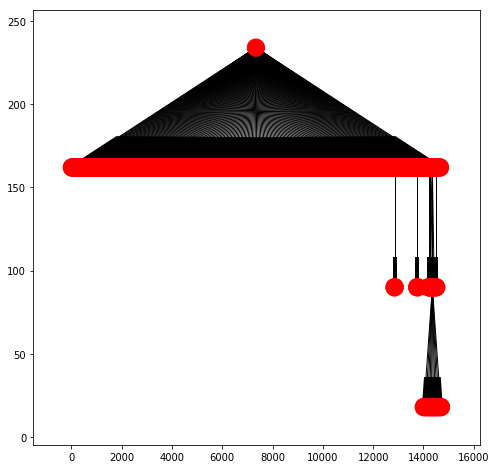

In [108]:
ont = '../output/analyzing_clixo_ontologies/'
ont += 'option2_string_synapse_interactions_combined_score.clixo_alpha0.2_beta0.6.txt'
ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'stringdb_ont.png')
fig.savefig(fn, dpi=200)

/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


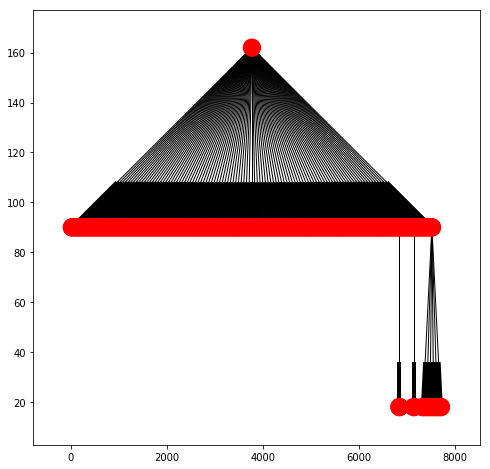

In [109]:
ont = '../analyses/Histogram_ont/finalontology3.txt'
ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'stringdb_ont.png')
fig.savefig(fn, dpi=200)